# Plot VTK files using Matplotlib 

This library is useful to plot vector fields stored in VTK files (.vtu) using Matplotlib

## Libraries

In [18]:
# To generate the vector fields
import dolfin as df
import mshr

import numpy as np

import plot_vtk_matplotlib as pvm
# Reloading is necessary since the labels are not properly
# updated
reload(pvm)

<module 'plot_vtk_matplotlib' from 'plot_vtk_matplotlib.py'>

In [5]:
%matplotlib inline

# Generate 2D Vector Field using Dolfin

We will generate a random two dimensional vector field using Fenics (Dolfin) in a 3x3 square mesh

In [7]:
mesh = mshr.Rectangle(df.Point(-3, -3), df.Point(3, 3))
mesh = mshr.generate_mesh(mesh, 10)
vspace = df.VectorFunctionSpace(mesh, 'Lagrange', degree=1, dim=2)
vfunction = df.Expression(("sin(x[1])", "cos(x[0])"))
vfunction = df.interpolate(vfunction, vspace)
# df.plot(vfunction, interactive=True)

DEBUG:FFC:Reusing form from cache.


<dolfin.cpp.io.VTKPlotter; proxy of <Swig Object of type 'std::shared_ptr< dolfin::VTKPlotter > *' at 0x7f1f78883a20> >

We can now save the data in a VTK file. By default, Fenics saves XML files (instead of binary) using an unstructured grid, with the .vtu extension

In [8]:
_file = df.File('dolfin_vector_field_2d.pvd')
_file << vfunction

We can now use the plotting library passing the path to the VTK file. When loading the data, we must specify the range of spatial *z* values from where a slice of data is going to be plotted.

After starting the *plot_vtk_matplotlib* class with the VTK file path, it is necessary to extract the data. The vtkXMLUnstructuredGrid is the default format option to load the data from the .vtu file. We can change this option using the *vtkfiletype* option (see the documentation for more details).

In [69]:
# Load our skyrmionic state
vf_plot = pvm.plot_vtk_matplotlib('./dolfin_vector_field_2d000000.vtu',
                                  z_max=1, z_min=-1,
                                  )
# Extract the data from the file
vf_plot.extract_data(# vtkfiletype=XMLStructuredGrid
                     )

We can now start exprimenting with the options. One of the most interesting functions is *plot_vtk* which shows an interpolated colormap using the data in the slice specified when extracting the information.
One of the nicest features of this function is to use a HSV mapping to show the orientation of the in plane components of the vectors, which can be mapped in the range 0 to 2 $\pi$.

By default, the quiver plot on top is shown with the raw data and a inverted colormap (if not HSV) or as black arrows if using the HSV option. The arrows color can be modified playing with the *quiver_type* options, which can also specify if the vector field arrows are going to be interpolated in a regular grid using the data from the slice. The HSV mapping uses SciPy.

In this case we use the the *'2d'* option for the *hsv_map* option since we have a 2D vector field. The VTK file in this case has the z components set as zero and if using *'3d'* the background would look black.

The colormap is interpolated in an *nx* by *ny* grid.

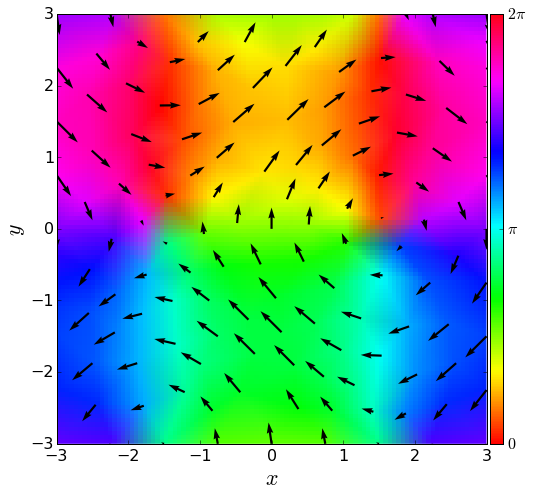

In [70]:
# Plot the y component and arrows in black
vf_plot.plot_vtk(-3, 3,
                -3, 3,
                # nx=50, ny=50,
                v_component='vy',
                hsv_map='2d',
                # figsize=(10, 10),
                # savefig='hsv_map.pdf',
                colorbar=True,
                quiver_type='raw_colour',
                )

The default option is to use a colormap for the interpolated data. We can also specify to use *natgrid* instead of *scipy* for interpolating the data. The *linear* method is better than the default *'nn'* (natural neighbours) but still a bad approximation, compared with SciPy.

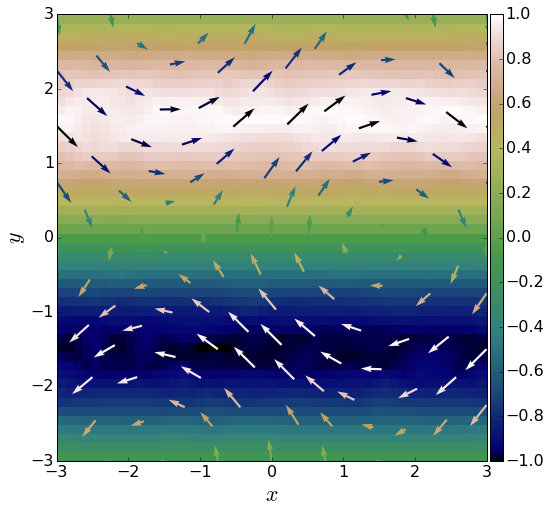

In [71]:
# Plot the y component and arrows in black
vf_plot.plot_vtk(-3, 3,
                -3, 3,
                nx=50, ny=50,
                v_component='vx', 
                # cmap='RdBu',
                interpolator='natgrid',
                interpolator_method='linear', 
                # figsize=(10, 10),
                colorbar=True,
                # quiver_type='raw_colour',
                )

We can also use a quiver plot, which can also be interpolated if necessary. Extra arguments can be passed to control the arrow definitions. The default interpolation is made with SciPy and a linear method. These options can be changed with *interpolator* and *interpolator_method* respectively.

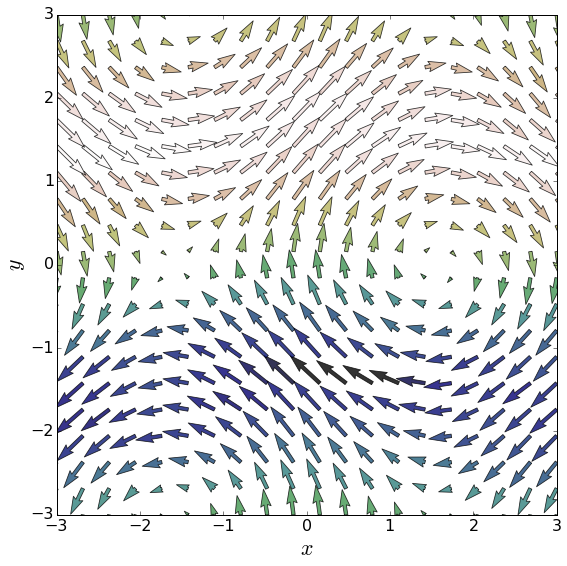

In [31]:
# Quiver plot
vf_plot.plot_quiver(quiver_type='interpolated_cmap',
                    x_min=-3, x_max=3,
                    y_min=-3, y_max=3,
                    linewidth=0.8, 
                    scale=1 / 0.06,
                    width=0.007,
                    alpha=0.8,
                    v_component='vx',
                    savefig='vector_field.png'
                    )

# 3D Vector Field

We will now generate a 3D vector field inside a sphere to test how the slicing works:

In [74]:
mesh = mshr.Sphere(df.Point(0, 0), 5)
mesh = mshr.generate_mesh(mesh, 10)

vspace = df.VectorFunctionSpace(mesh, 'Lagrange', degree=1, dim=3)

vfunction = df.Expression(("sin(x[1])", "cos(x[0])", "sin(x[2])"))
vfunction = df.interpolate(vfunction, vspace)

# We can plot the field using Dolfin 
# df.plot(vfunction, interactive=True)

# We can plot the mesh
# df.plot(mesh, interactive=True)

DEBUG:FFC:Reusing form from cache.


We save the data as before:

In [75]:
_file = df.File('dolfin_sphere_vector_field_3d.pvd')
_file << vfunction

Now we load the function and specify a slice in the middle of the sphere

In [19]:
# Load our skyrmionic state
vf_plot = pvm.plot_vtk_matplotlib('./dolfin_sphere_vector_field_3d000000.vtu',
                                  z_max=0.8, z_min=-0.8)
# Extract the data from the file
vf_plot.extract_data()

If we plot the slice with a 3D HSV mapping, darker regions indicate the lower $z$ magnitudes of the vector field, while the brighter regions indicate the highest $z$ values.

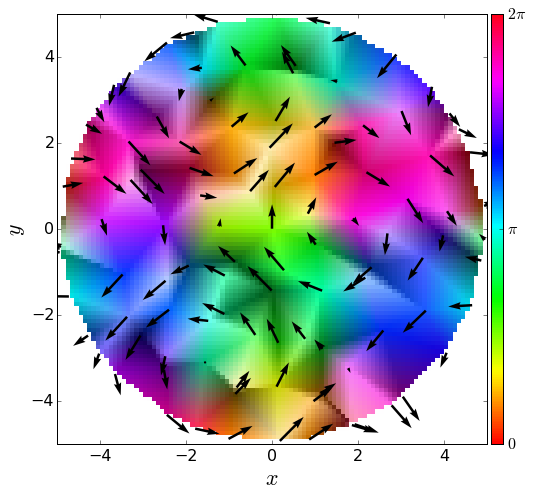

In [77]:
# plot the x component and arrows in black
vf_plot.plot_vtk(-5, 5,
                -5, 5,
                nx=100, ny=100,
                v_component='vz',,
                hsv_map='3d',
                # figsize=(10, 8),
                colorbar=True,
                quiver_type='raw_colour', 
                )

We can interpolate this slice and get a quiver plot from the vector field

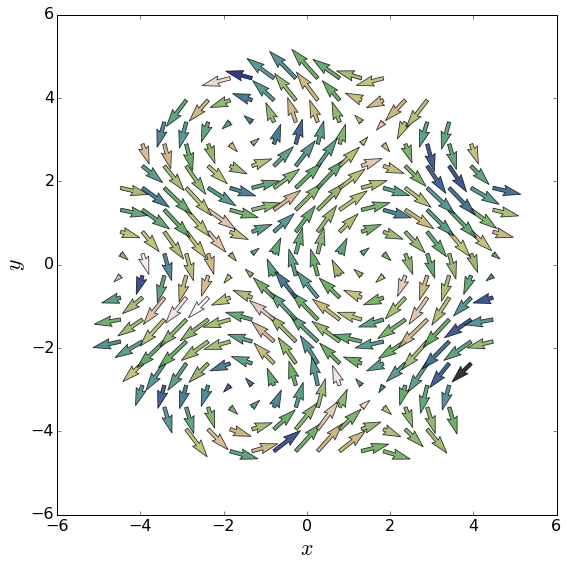

In [24]:
# Quiver plot
vf_plot.plot_quiver(quiver_type='interpolated_cmap',
                    x_min=-5, x_max=5,
                    y_min=-5, y_max=5,
                    linewidth=0.8, 
                    scale=1 / 0.06,
                    width=0.007,
                    alpha=0.8,
                    v_component='vz'
                    )

We can also redefine the range of $z$ values where the data is extracted, but this is not very accurate for a mesh in finite elements since many points are not exactly in the slice plane, thus the approximation can be bad. The quiver plot on top can be disabled making the quiver_type as None or False.

In [10]:
vf_plot.z_min, vf_plot.z_max = 4, 5

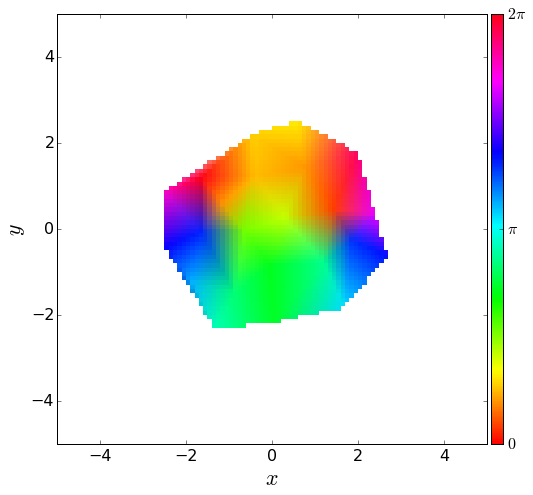

In [11]:
# Quiver plot
vf_plot.plot_vtk(-5, 5,
                -5, 5,
                nx=100, ny=100,
                v_component='vy',
                hsv_map='2d',
                colorbar=True,
                quiver_type=None,
                )

# Extending with Matplotlib

We can use predefined axes to generate, for instance, grids of plots. We will use the *vf_plot* object from the previous section

In [12]:
import matplotlib.pyplot as plt

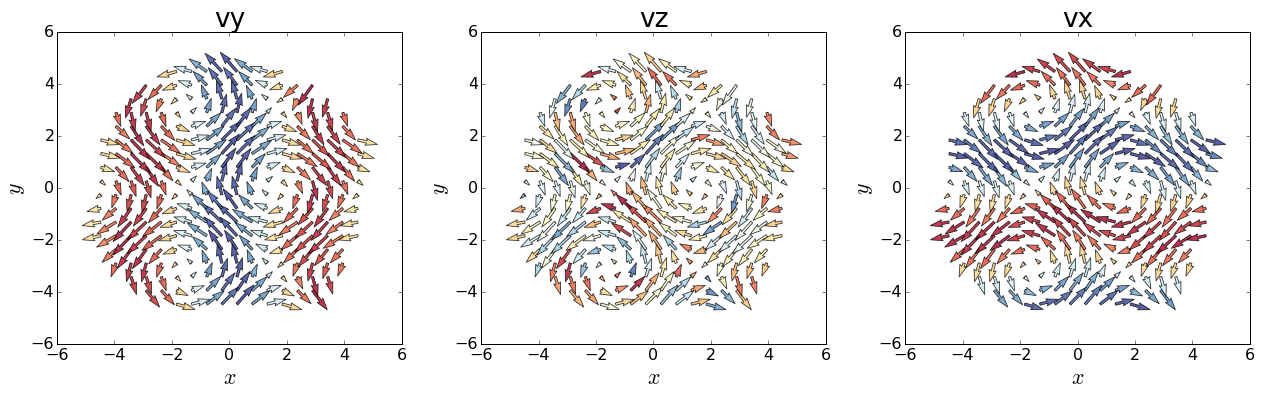

In [30]:
fig = plt.figure(figsize=(18, 6))
comps = ['vx', 'vy', 'vz']

for i in range(3):
    ax = fig.add_subplot(1, 3, i)
    
    vf_plot.plot_quiver(quiver_type='interpolated_cmap',
                    x_min=-5, x_max=5,
                    y_min=-5, y_max=5,
                    linewidth=0.8, 
                    scale=1 / 0.06,
                    width=0.007,
                    alpha=0.8,
                    cmap='RdYlBu',
                    v_component=comps[i],
                    predefined_axis=ax,
                    )
    ax.set_title(comps[i])
    # ax.axis('off')

In general, we can customise the plots getting the axes (*plt.gcf().gca()* for example) and defining matplotlib functions, such as titles.